In [4]:
%%shell
# Inspred by https://colab.research.google.com/github/tensorflow/io/blob/master/docs/tutorials/postgresql.ipynb#scrollTo=YUj0878jPyz7
sudo apt-get -y -qq update
sudo apt-get -y -qq install postgresql-14
# Start postgresql server
sudo sed -i "s/port = 5432/port = 5433/g" /etc/postgresql/14/main/postgresql.conf
sudo service postgresql start
# Set password
sudo -u postgres psql -U postgres -c "ALTER USER postgres PASSWORD 'pyqrlew-db'"
# Install python packages
pip install -U pyqrlew graphviz

UsageError: Cell magic `%%shell` not found.


In [5]:
from pyqrlew.io import PostgreSQL

In [6]:
# Read data
db = PostgreSQL()
dataset = db.financial()

Error response from daemon: network with name qrlew-net already exists


In [7]:
dataset.relations()

[(['financial', 'financial', 'account'], <Relation at 0x12b4b3510>),
 (['financial', 'financial', 'card'], <Relation at 0x12b4bf170>),
 (['financial', 'financial', 'client'], <Relation at 0x12b4e5530>),
 (['financial', 'financial', 'disp'], <Relation at 0x12b4e50b0>),
 (['financial', 'financial', 'district'], <Relation at 0x12b4e5490>),
 (['financial', 'financial', 'loan'], <Relation at 0x12b4e54d0>),
 (['financial', 'financial', 'order'], <Relation at 0x12b4e5550>),
 (['financial', 'financial', 'trans'], <Relation at 0x12b4e5590>)]

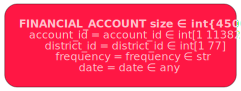

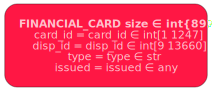

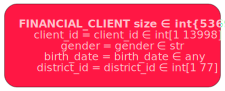

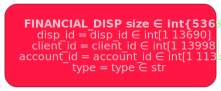

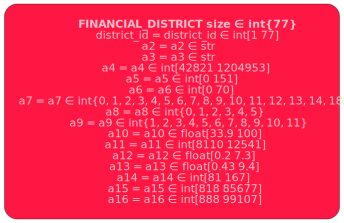

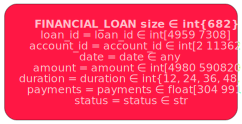

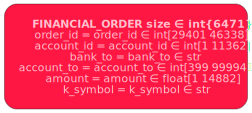

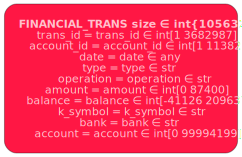

In [8]:
from graphviz import Source
from IPython.display import display

for path, relation in dataset.relations():
    display(Source(relation.dot()))

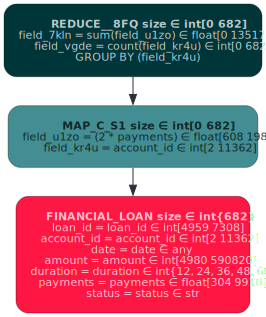

In [9]:
result = dataset.sql('SELECT sum(2*payments), count(account_id) FROM loan GROUP BY account_id')

Source(result.dot())

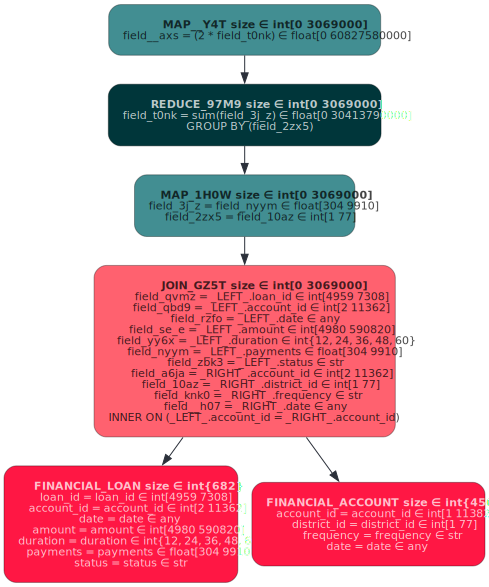

In [10]:
result = dataset.sql('SELECT 2*sum(payments) FROM loan join account ON loan.account_id=account.account_id GROUP BY district_id')

Source(result.dot())